In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 20

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()


In [4]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [5]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [6]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [7]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []


In [8]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

In [9]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)


In [10]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))


In [11]:
  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

In [12]:
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
1140/1140 [==============================] - 68s 59ms/step - loss: 1.4991 - accuracy: 0.4624
Epoch 2/10
1140/1140 [==============================] - 68s 60ms/step - loss: 1.0916 - accuracy: 0.6165
Epoch 3/10
1140/1140 [==============================] - 67s 59ms/step - loss: 0.9354 - accuracy: 0.6728
Epoch 4/10
1140/1140 [==============================] - 67s 59ms/step - loss: 0.8220 - accuracy: 0.7130
Epoch 5/10
1140/1140 [==============================] - 68s 60ms/step - loss: 0.7293 - accuracy: 0.7450
Epoch 6/10
1140/1140 [==============================] - 68s 60ms/step - loss: 0.6509 - accuracy: 0.7741
Epoch 7/10
1140/1140 [==============================] - 68s 59ms/step - loss: 0.5718 - accuracy: 0.7992
Epoch 8/10
1140/1140 [==============================] - 67s 59ms/step - loss: 0.5050 - accuracy: 0.8209
Epoch 9/10
1140/1140 [==============================] - 67s 59ms/step -

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.0616146326065063 - Accuracy: 70.20000219345093%


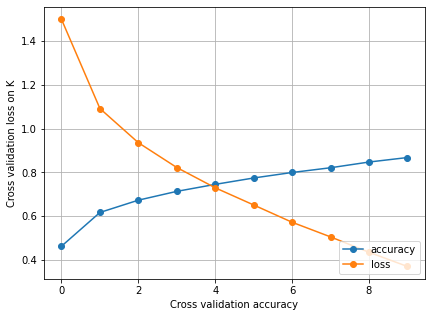

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 70.20000219345093 (+- 0.0)
> Loss: 1.0616146326065063
------------------------------------------------------------------------


In [13]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
   
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], 'o-', label='accuracy')
    plt.plot(history.history['loss'], 'o-', label='loss')
    #plt.plot(fold_no['KFold'], 'o-', label = 'loss_per_fold')
    plt.xlabel('Cross validation accuracy')
    plt.ylabel('Cross validation loss on K')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')